In [13]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
all_results = os.listdir("/new-stg/home/banghua/Pavel/results")
all_results_all = [i for i in all_results if "all" in i]
all_results_recovered = [i for i in all_results if "recovered" in i]

In [44]:
data_all = []
for i in all_results_all:
    with open(f"/new-stg/home/banghua/Pavel/results/{i}", "r") as f:
        data_all.append(json.load(f))

data_recovered = []
for i in all_results_recovered:
    with open(f"/new-stg/home/banghua/Pavel/results/{i}", "r") as f:
        data_recovered.append(json.load(f))

In [104]:
len(data_recovered[0]["high_score_overlap"])

888

In [45]:
overlap_final_scores, random_final_scores = [], []
for i in range(len(data_all)):
    data_i = data_all[i]
    data_i_overlap = data_i["overlap"]
    data_i_random = data_i["random"]
    data_i_overlap_scores = [i["final_score"] for i in data_i_overlap]
    data_i_random_scores = [i["final_score"] for i in data_i_random]
    overlap_final_scores.extend(data_i_overlap_scores)
    random_final_scores.extend(data_i_random_scores)

In [49]:
overlap_final_scores_filtered, random_final_scores_filtered = [], []
for i in range(len(data_recovered)):
    data_i = data_recovered[i]
    data_i_overlap = data_i["high_score_overlap"]
    data_i_random = data_i["high_score_random"]
    data_i_overlap_scores = [i["final_score"] for i in data_i_overlap]
    data_i_random_scores = [i["final_score"] for i in data_i_random]
    overlap_final_scores_filtered.extend(data_i_overlap_scores)
    random_final_scores_filtered.extend(data_i_random_scores)

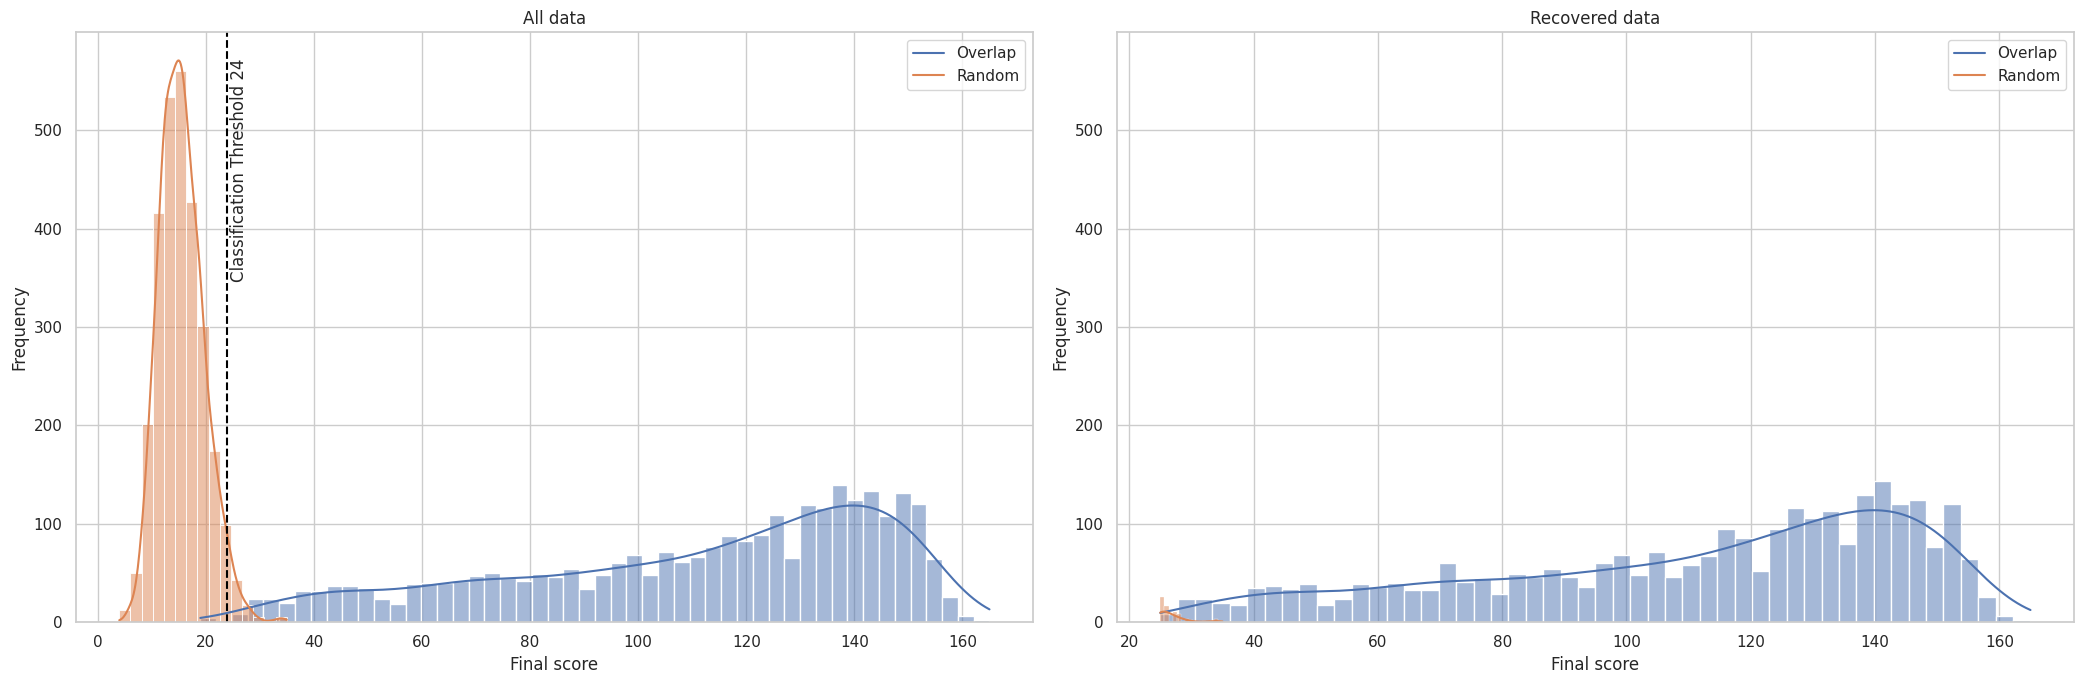

In [100]:
# Frequency plot of overlap_final_scores and random_final_scores and overlap_final_scores_filtered and random_final_scores_filtered in 
fig, ax = plt.subplots(1, 2, figsize=(21, 7))
sns.histplot(overlap_final_scores, kde=True, ax=ax[0], bins=50)
sns.histplot(random_final_scores, kde=True, ax=ax[0], bins=15)
ax[0].set_title("All data")
ax[0].set_xlabel("Final score")
ax[0].set_ylabel("Frequency")
# Add x=24
ax[0].axvline(x=24, color="black", linestyle="--", label="x=24")
ax[0].text(24.5,350,'Classification Threshold 24',rotation=90)
sns.histplot(overlap_final_scores_filtered, kde=True, ax=ax[1], bins=50)
sns.histplot(random_final_scores_filtered, kde=True, ax=ax[1], bins=15)
# Same y-axis for both plots
ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_title("Recovered data")
ax[1].set_xlabel("Final score")
ax[1].set_ylabel("Frequency")
# Add legend
ax[0].legend(["Overlap", "Random"])
ax[1].legend(["Overlap", "Random"])
# Reduce the whitespace at the left/right of the plot
plt.tight_layout()
plt.show()
# Save 400dpi
fig.savefig("final_score_frequency.png", dpi=400)
